<a href="https://colab.research.google.com/github/YasirHabib/tensorflow/blob/master/celsius_fahrenheit_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch import optim

In [0]:
x = np.array([-40, -10, 0, 8, 15, 22, 38])
y = np.array([-40, 14, 32, 46, 59, 72, 100])

x_ = x.reshape(-1,1)
y_ = y.reshape(-1,1)

x__ = torch.from_numpy(x_).float()
y__ = torch.from_numpy(y_).float()

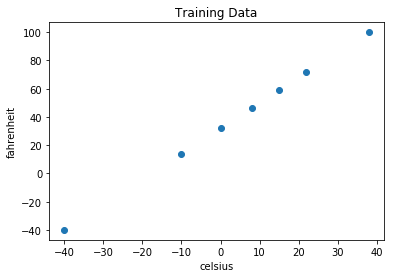

In [92]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel("celsius") 
plt.ylabel("fahrenheit") 
plt.title("Training Data") 
plt.show()

In [0]:
learning_rate = 0.001
training_epochs = 2500

In [0]:
model = torch.nn.Linear(1,1)

loss = torch.nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [0]:
def train(model, loss, optimizer, inputs, labels):
  inputs = Variable(inputs, requires_grad=False)
  labels = Variable(labels, requires_grad=False)
  
  optimizer.zero_grad()
  
  # get output from the model, given the inputs
  logits = model.forward(inputs)
  # get loss for the predicted output
  cost = loss.forward(logits, labels)
  
  # get gradients w.r.t to parameters
  cost.backward()
  # update parameters
  optimizer.step()
  
  return cost.item()

In [0]:
def predict(model, inputs):
  inputs = Variable(inputs, requires_grad=False)
  
  # get output from the model, given the inputs
  return model.forward(inputs)

In [97]:
c = 0.
costs=[]
for epoch in range(training_epochs):
  c = train(model, loss, optimizer, x__, y__)
    
  if (epoch+1) % 50 == 0:
    costs.append(c)
      
    print("Epoch", (epoch + 1), ": cost =", c)
    
for param in model.parameters():
  print(param.data)

Epoch 50 : cost = 819.22265625
Epoch 100 : cost = 675.9671630859375
Epoch 150 : cost = 557.7642822265625
Epoch 200 : cost = 460.2331848144531
Epoch 250 : cost = 379.7582092285156
Epoch 300 : cost = 313.3567199707031
Epoch 350 : cost = 258.5675354003906
Epoch 400 : cost = 213.35997009277344
Epoch 450 : cost = 176.0584259033203
Epoch 500 : cost = 145.2802734375
Epoch 550 : cost = 119.88449096679688
Epoch 600 : cost = 98.9299545288086
Epoch 650 : cost = 81.6399917602539
Epoch 700 : cost = 67.3738021850586
Epoch 750 : cost = 55.602455139160156
Epoch 800 : cost = 45.889678955078125
Epoch 850 : cost = 37.87549591064453
Epoch 900 : cost = 31.26277732849121
Epoch 950 : cost = 25.806562423706055
Epoch 1000 : cost = 21.304466247558594
Epoch 1050 : cost = 17.58978271484375
Epoch 1100 : cost = 14.524758338928223
Epoch 1150 : cost = 11.995683670043945
Epoch 1200 : cost = 9.908884048461914
Epoch 1250 : cost = 8.187064170837402
Epoch 1300 : cost = 6.766333103179932
Epoch 1350 : cost = 5.5940127372741

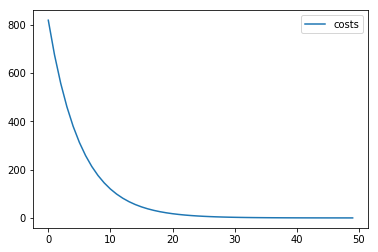

In [98]:
plt.plot(costs, label="costs")
plt.legend()

In [0]:
predictions = predict(model, x__)
predictions = predictions.data.numpy()

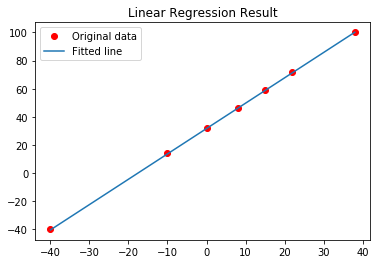

In [100]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ="Original data") 
plt.plot(x, predictions, label ="Fitted line") 
plt.title("Linear Regression Result") 
plt.legend() 
plt.show()